In [2]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import numpy as np
import math
import srkgraphics
import srkanalysis
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['xtick.labelsize'] = 20
graphs_dir='/home/mjbales/work/nedm/graphs/'

b_gradient_str = [1.e-10, 1.e-9, 1.e-8]
Omega_range=srkmisc.even_sample_over_log(.1, 10, 100)
legend_titles_b_gradients=[str(x)+' T/m B Gradient' for x in b_gradient_str]
omega_0=(4.84578839927e7*1e-6)
Omega_scale_factor= 0.235*(4.84578839927e7*1e-6)

import ROOT
from ROOT import TF1,gPad,gStyle,TCanvas,TH1D,gROOT
import rootnotes
import rootprint
gStyle.SetOptFit()
gStyle.SetOptStat(0)
gROOT.ForceStyle();
c1=rootnotes.canvas("Canvas", (1200, 800))
c1.SetRightMargin(0.3)
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
histogram2 = TH1D("phi_hist2","phi_hist2",100,-5,5)
histogram3 = TH1D("phi_hist3","phi_hist3",100,-5,5)

10000000000.0
[  1.00000000e-10   5.10000000e-09   1.01000000e-08   1.51000000e-08
   2.01000000e-08   2.51000000e-08   3.01000000e-08   3.51000000e-08
   4.01000000e-08   4.51000000e-08   5.01000000e-08   5.51000000e-08
   6.01000000e-08   6.51000000e-08   7.01000000e-08   7.51000000e-08
   8.01000000e-08] [0.6696494022233123, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67]


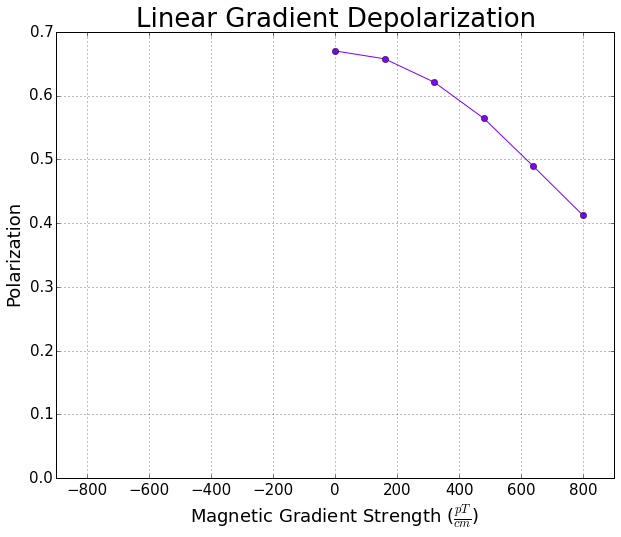

In [22]:
pT_per_cm=0.01*1e12
# lambda_func=[lambda x: x / Omega_scale_factor,lambda x: -1./math.log(1-x),lambda x: x / Omega_scale_factor,lambda x: -1./math.log(1-x)]
lambda_func=[lambda x: x*pT_per_cm,lambda x: .67*(1-2*x),lambda x: x,lambda x: x]
lines=[range(5484,5490)]

srkgraphics.make_plot_from_database(lines, ["BGradFieldStrength", "Par_SzDetProb"], 
                        titles=['Linear Gradient Depolarization',r'Magnetic Gradient Strength ($\frac{pT}{cm}$)','Polarization'],
                        lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.xscale('log', noncvposy='clip')
t= np.arange(1/pT_per_cm, 850./pT_per_cm, 50./pT_per_cm)
y=[]
print pT_per_cm
for i in t:
    y+=[0.67*(1-math.exp(-180./(16.*0.5/(10.*10.*10.*1.83247172e8*1.83247172e8*i*i))))]
print t,y
plt.plot(t,y )
plt.axis([ -900, 900,0, .7])
plt.xticks(np.arange(-800, 900, 200))
plt.savefig("/home/mjbales/work/nedm/graphs/PolarizationLinearGradients.svg", bbox_inches='tight')
plt.show()